In [1]:
import sys
sys.path.append('..')

In [2]:
import utils
import utils_preprocess
import utils_spatial

import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt

# STEP 1: Preprocessing PDSI and GLDAS data into Tabular Format

In [ ]:
# Process the pdsi netcdf files to obtain tabular data pickle file
pdsi_source_directory = r'C:\Users\saulg\Desktop\Remote_Data\pdsi'
pdsi_target_directory = r'C:\Users\saulg\Desktop\Remote_Data\pdsi_tabular'

utils_preprocess.process_pdsi_data(
    source_directory=pdsi_source_directory, 
    target_directory=pdsi_target_directory,
    date_start='01/01/1850',
    date_end='12/31/2020',
    )

In [ ]:
# Process the gldas netcdf files to obtain tabular data pickle file
gldas_source_directory = r'C:\Users\saulg\Desktop\Remote_Data\GLDAS'
gldas_target_directory = r'C:\Users\saulg\Desktop\Remote_Data\gldas_tabular'

utils_preprocess.process_gldas_data(
    source_directory=gldas_source_directory, 
    target_directory=gldas_target_directory,
    )

# Step 2: Transform PDSI, GLDAS, and Well Observations into format for ML

In [7]:
# Load the shapefile
path_shape = '/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/aquifer_shapes/Beryl_Enterprise.shp'
aquifer_shape = utils.load_shapefile(path=path_shape)

In [8]:
# Parse pdsi data and save it
directory_pdsi = r"/mnt/c/Users/saulg/Desktop/Remote_Data/pdsi_tabular"
pdsi:dict = utils.pull_relevant_data(
    shape=aquifer_shape, 
    dataset_name="PDSI", 
    dataset_directory=directory_pdsi
    )
utils.save_pickle(
    data=pdsi, 
    file_name="pdsi_data.pickle", 
    directory="/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs",
    protocol=3)

INFO:utils:Analyzing PDSI dataset...
INFO:utils:Creating boundary polygon...
INFO:utils:Boundary polygon created: (-113.91059087719414, 37.548759279540675, -113.39869650032699, 37.98908390357162)
INFO:utils:Creating pseudo grid...
INFO:utils:Grid created.
INFO:utils:Finding intercepting cells...
INFO:utils:Found 1 cells.
INFO:utils:Pulling data from cells...
INFO:utils:Pickle file 'sc_PDSI_pm_filled.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/pdsi_tabular'
INFO:utils:Parsing Cell_2186 1 / 1
INFO:utils:Data pulled.
INFO:utils:Validating data...
INFO:utils:Removed 0 invalid cells.
INFO:utils:Remaining 1 cells.
INFO:utils:Data validated.
INFO:utils:Pickle file 'pdsi_data.pickle' saved successfully to '/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs'


In [9]:
# Parse the GLDAS data and save it
directory_gldas = r"/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular"
gldas:dict = utils.pull_relevant_data(
    shape=aquifer_shape, 
    dataset_name="GLDAS", 
    dataset_directory=directory_gldas
    )
utils.save_pickle(
    data=gldas, 
    file_name="gldas_data.pickle", 
    directory="/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs",
    protocol=3)

INFO:utils:Analyzing GLDAS dataset...
INFO:utils:Creating boundary polygon...
INFO:utils:Boundary polygon created: (-113.91059087719414, 37.548759279540675, -113.39869650032699, 37.98908390357162)
INFO:utils:Creating pseudo grid...
INFO:utils:Grid created.
INFO:utils:Finding intercepting cells...
INFO:utils:Found 6 cells.
INFO:utils:Pulling data from cells...
INFO:utils:Pickle file 'Albedo_inst.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular'
INFO:utils:Pickle file 'AvgSurfT_inst.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular'
INFO:utils:Pickle file 'CanopInt_inst.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular'
INFO:utils:Pickle file 'ECanop_tavg.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular'
INFO:utils:Pickle file 'ESoil_tavg.pickle' loaded successfully from '/mnt/c/Users/saulg/Desktop/Remote_Data/gldas_tabular'
INFO:utils:Pick

In [10]:
# Process well data from csv files
well_locations = pd.read_csv("/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/aquifer_data/EscalanteBerylLocation.csv")
well_timeseries = pd.read_csv("/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/aquifer_data/EscalanteBerylTimeseries.csv")
data:dict = utils.transform_well_data(
    well_timeseries=well_timeseries, 
    well_locations=well_locations,
    timeseries_name="timeseries",
    locations_name="locations",
    )
utils.save_pickle(
    data=data, 
    file_name="beryl_enterprise_data.pickle", 
    directory="/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs", 
    protocol=3,
    )


INFO:utils:Making well dictionary...
INFO:utils:Well dictionary made.
INFO:utils:Processing well data...
INFO:utils:Removing outliers...


INFO:utils:Outliers removed.
INFO:utils:Selecting qualifing wells...
INFO:utils:Qualifing wells selected.
INFO:utils:Padding well measurements...
INFO:utils:Well measurements padded.
INFO:utils:Updating locations...
INFO:utils:Locations updated.
INFO:utils:Well data processed.
INFO:utils:Merging well data...
INFO:utils:Well data merged.
INFO:utils:Pickle file 'beryl_enterprise_data.pickle' saved successfully to '/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs'


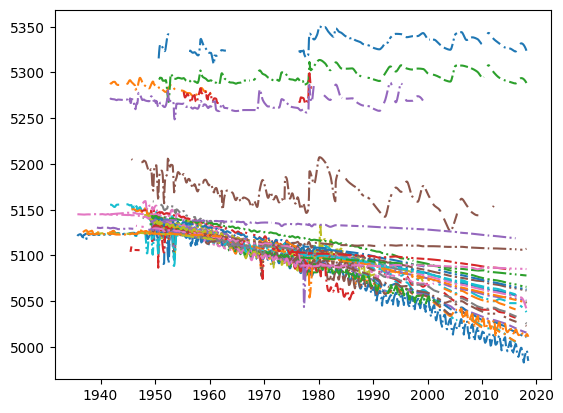

In [11]:
# Plot the timeseries data to see if it looks reasonable
plt.plot(data["timeseries"], '-.')
plt.show()

# Step 3: Develop initial imputation model

# Step 4: Develop iterative refinement model

# Step 5: Analyze spatial characteristics of imputation model

In [15]:
data_path = "/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs/beryl_enterprise_well_data_imputation_iteration_2.pickle"

utils_spatial.kriging_interpolation(
    data_pickle_path = data_path,
    shape_file_path = path_shape,
    n_x_cells=100,
    influence_distance=0.125,
    monthly_time_step=1,
    netcdf_filename="beryl_enterprise_well_data_imputation_iteration_2.nc",
    directory="/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs"
    )

INFO:utils:Pickle file '/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs/beryl_enterprise_well_data_imputation_iteration_2.pickle' loaded successfully from './'
INFO:root:Longitude range is: 0.512.
INFO:root:Latitude range is: 0.44.
INFO:root:Grid Resolution is 0.005.
INFO:root:Processing date: 1948-01-01 00:00:00
INFO:root:Processing date: 1948-02-01 00:00:00
INFO:root:Processing date: 1948-03-01 00:00:00
INFO:root:Processing date: 1948-04-01 00:00:00
INFO:root:Processing date: 1948-05-01 00:00:00
INFO:root:Processing date: 1948-06-01 00:00:00
INFO:root:Processing date: 1948-07-01 00:00:00
INFO:root:Processing date: 1948-08-01 00:00:00
INFO:root:Processing date: 1948-09-01 00:00:00
INFO:root:Processing date: 1948-10-01 00:00:00
INFO:root:Processing date: 1948-11-01 00:00:00
INFO:root:Processing date: 1948-12-01 00:00:00
INFO:root:Processing date: 1949-01-01 00:00:00
INFO:root:Processing date: 1949-02-01 00:00:00
INFO:root:Pro

# Step 6: Calculate Storage Change

INFO:root:Cells have same resolution in x direction.
INFO:root:The storage coefficient is set to 0.20.
INFO:root:Calculating raster area...
INFO:root:Area calculated.
INFO:root:The area of the aquifer is: 0.28 million acres
INFO:root:Calculating monthly deltas...
INFO:root:Monthly deltas calculated.
INFO:root:Calculating storage change...
INFO:root:Storage change calculated.
INFO:root:Filtering storage change curve...
INFO:root:Available time range: 1948-01-01 00:00:00 - 2020-12-01 00:00:00
INFO:root:Filtering time range: 1948-01-01 00:00:00 - 2020-12-01 00:00:00
INFO:root:Storage change curve filtered.
INFO:root:Final drawdown calculated: -3.19 million acre-feet


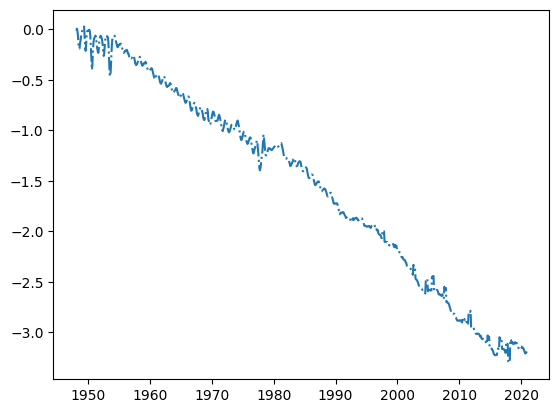

In [3]:
raster = nc.Dataset("/home/saul/workspace/Well_Imputation/groundwater_imputation_api/src/imputation_api/artifacts/dataset_outputs/beryl_enterprise_well_data_imputation_iteration_2.nc", 'r')

spatial_analysis = utils_spatial.StorageChangeCalculator(
    units="English",
    storage_coefficient=0.2,
    anisotropic="x",
)
storage_change = spatial_analysis.calulate_storage_curve(
    raster=raster, 
    date_range_filter=("1938-01-01", "2020-12-31"), # if you need to filter dates outside of original time range
    )

plt.plot(storage_change, '-.')